In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import *

In [5]:
dir = '/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT'
epo_files = []
subjects = ['BCOM_18_2']
avoid_reading = True
for subject in subjects:
    for root, dirs, files in os.walk(dir):
            for file in files:
                if file.startswith(subject):
                    epo_name = file[10:-8]

                    if (avoid_reading == True) and (sum(c.isdigit() for c in epo_name) < 3): #segments where the subject is actually just reading rather than imagining have 2 digits
                        continue
            
                    file = os.path.join(dir, file)
                    epo_files.append(file)


In [7]:
re = mne.read_epochs(epo_files[0])

Reading /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT/BCOM_18_2_re_144-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated


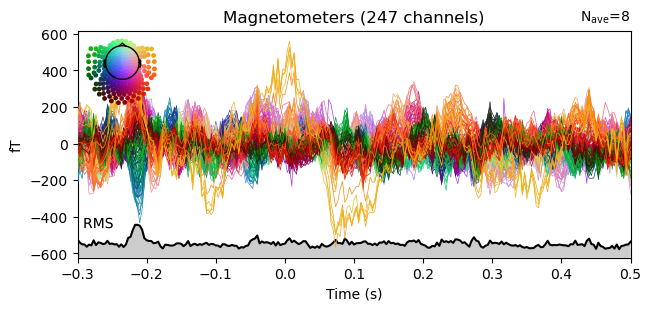

Using qt as 2D backend.
Using pyopengl with version 3.1.6


2024-11-12 11:56:17.451 python[30178:11187936] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-12 11:56:17.451 python[30178:11187936] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Dropped 5 epochs: 0, 1, 2, 3, 4
The following epochs were marked as bad and are dropped:
[0, 1, 2, 3, 4]
Channels marked as bad:
none


In [ ]:
re_evoked = re.average()
re_evoked.plot(spatial_colors=True, gfp=True, time_unit='s')
re.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/opt/homebrew/Caskroom/miniconda/base/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


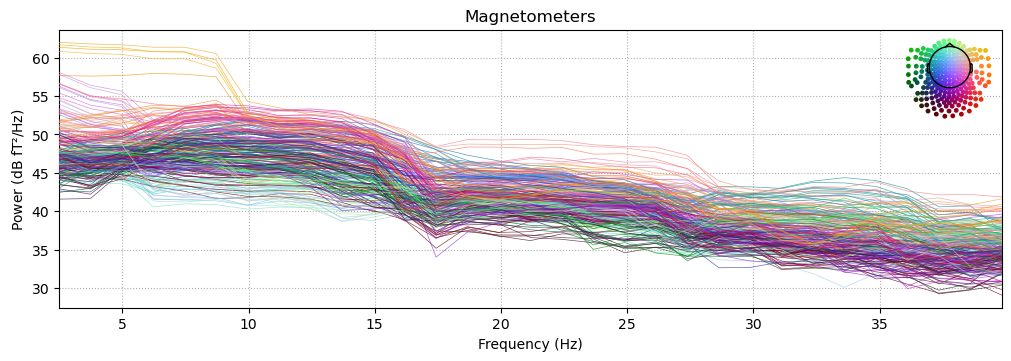

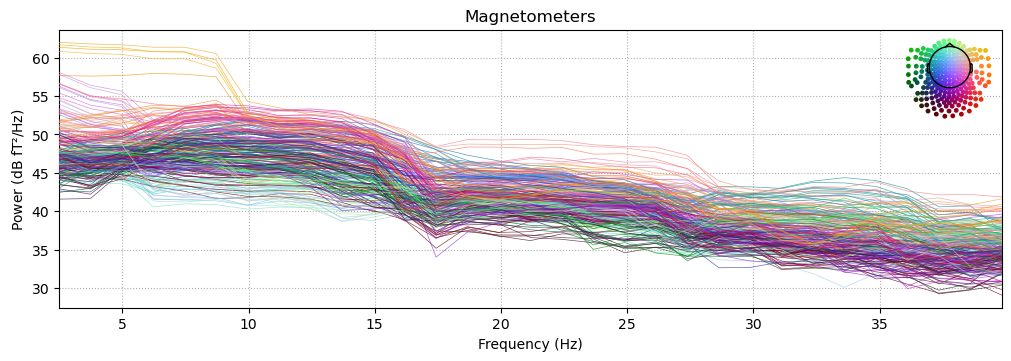

In [11]:
re_evoked.plot_psd(fmin=2., fmax=40.)

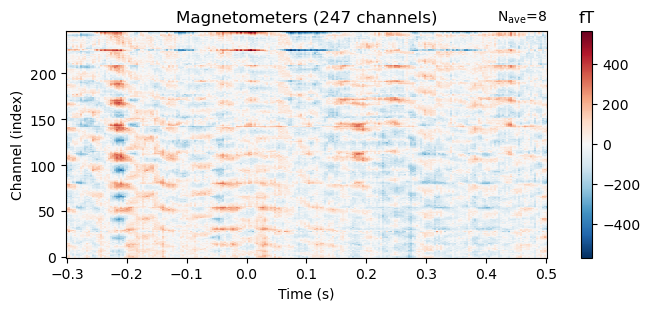

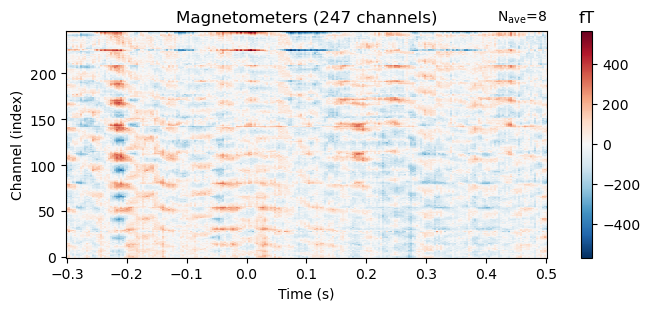

In [12]:
re_evoked.plot_image(picks='meg')

No projector specified for this dataset. Please consider the method self.add_proj.


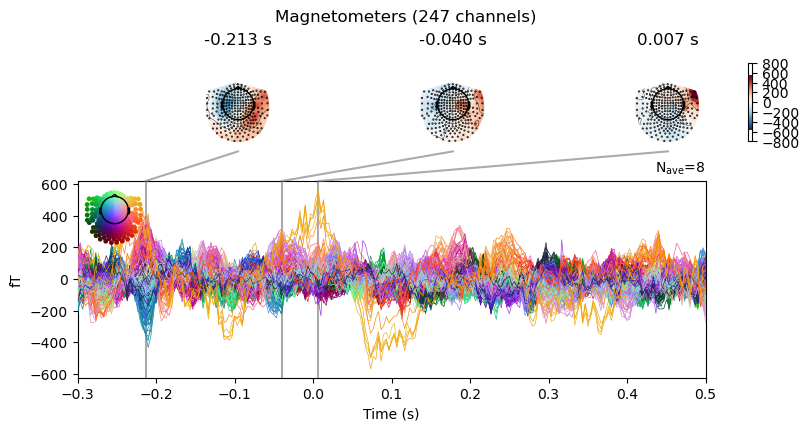

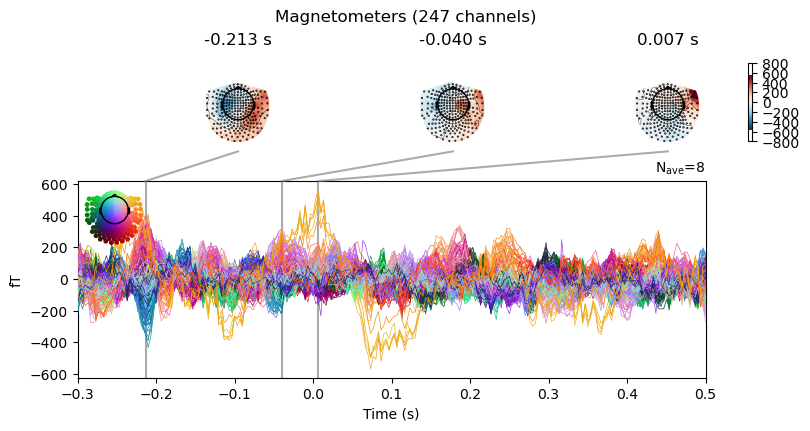

In [13]:
re_evoked.plot_joint()

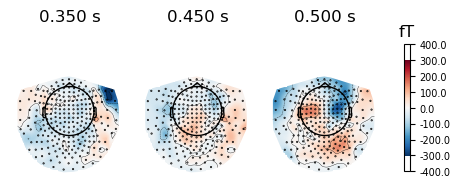

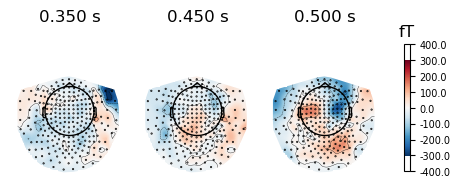

In [17]:
re_evoked.plot_topomap(times=[0.35, 0.45, 0.5])

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s


No baseline correction applied


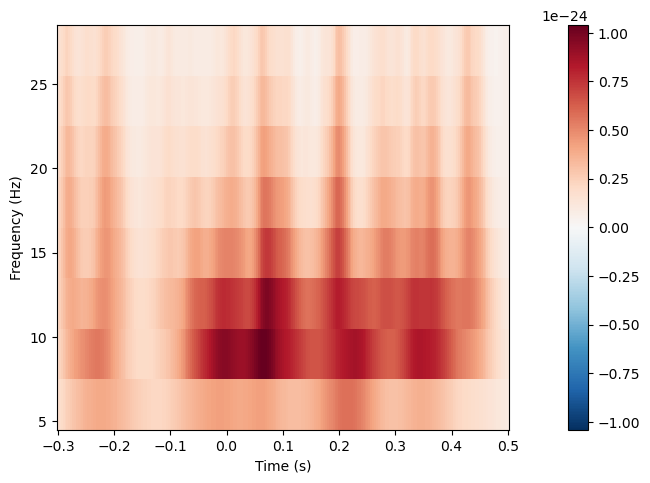

[<Figure size 640x480 with 2 Axes>]

In [20]:
power = mne.time_frequency.tfr_morlet(re, freqs=np.arange(6, 30, 3), n_cycles=2, return_itc=False)
power.plot([0])